# Evidence of Discrimination?

The Department of Developmental Services (DDS) in California is responsible for allocating funds to support over 250,000 developmentally-disabled residents. The data set `ca_dds_expenditures.csv` contains data about 1,000 of these residents. The data comes from a discrimination lawsuit which alleged that California's Department of Developmental Services (DDS) privileged white (non-Hispanic) residents over Hispanic residents in allocating funds. We will focus on comparing the allocation of funds (i.e., expenditures) for these two ethnicities only, although there are other ethnicities in this data set.

There are 6 variables in this data set:

- Id:  5-digit, unique identification code for each consumer (similar to a social security number and used for identification purposes)  
- Age Cohort:  Binned age variable represented as six age cohorts (0-5, 6-12, 13-17, 18-21, 22-50, and 51+)
- Age:  Unbinned age variable
- Gender:  Male or Female
- Expenditures:  Dollar amount of annual expenditures spent on each consumer
- Ethnicity:  Eight ethnic groups (American Indian, Asian, Black, Hispanic, Multi-race, Native Hawaiian, Other, and White non-Hispanic)

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Question 1

Read in the data set. Make a graphic that compares the _average_ expenditures by the DDS on Hispanic residents and white (non-Hispanic) residents. Comment on what you see.

In [57]:
# YOUR CODE HERE
df = pd.read_csv('ca_dds_expenditures.csv')
dwnh = pd.read_csv('ca_dds_expenditures.csv')
dh = pd.read_csv('ca_dds_expenditures.csv')
davg = pd.read_csv('ca_dds_expenditures.csv')
df.head()

,Id,Age Cohort,Age,Gender,Expenditures,Ethnicity
0,10210,13 to 17,17,Female,2113,White not Hispanic
1,10409,22 to 50,37,Male,41924,White not Hispanic
2,10486,0 to 5,3,Male,1454,Hispanic
3,10538,18 to 21,19,Female,6400,Hispanic
4,10568,13 to 17,13,Male,4412,White not Hispanic


<AxesSubplot:xlabel='Ethnicity'>

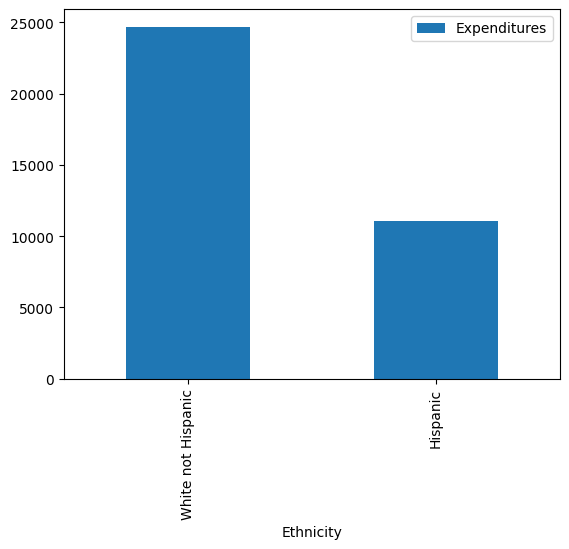

In [58]:
table = pd.pivot_table(data=df, values='Expenditures', index='Ethnicity', aggfunc=(np.mean))

table.loc[['White not Hispanic', 'Hispanic']].plot(kind = 'bar')

**YOUR EXPLANATION HERE**
White not hispanics have more expenditures by more than double what hispanics do.

# Question 2

Now, calculate the average expenditures by ethnicity and age cohort. Make a graphic that compares the average expenditure on Hispanic residents and white (non-Hispanic) residents, _within each age cohort_. 

Comment on what you see. How do these results appear to contradict the results you obtained in Question 1?

<AxesSubplot:xlabel='Ethnicity,Age Cohort'>

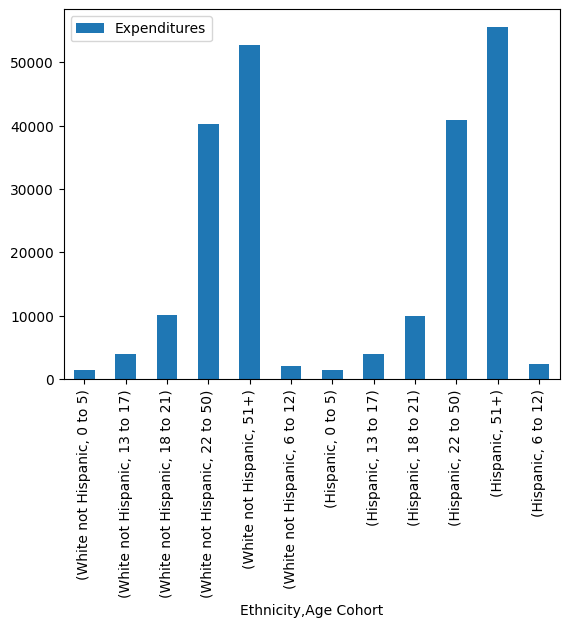

In [59]:
# YOUR CODE HERE
table = pd.pivot_table(data=df, values='Expenditures', index=['Ethnicity', 'Age Cohort'], aggfunc=(np.mean))

table.loc[['White not Hispanic', 'Hispanic']].plot(kind = 'bar')

**YOUR EXPLANATION HERE**
When viewing these stats by age, you notice that the expenditures are very similar depending on age. When you look at the age cohort of 51+ in Hispanics, you notice it is higher than white not hispanic 51+ year olds. This contradicts the last graph since the the averages are very similar in the different race groups but same age groups.

# Question 3

Can you explain the discrepancy between the two analyses you conducted above (i.e., Questions 1 and 2)? Try to tell a complete story that interweaves tables, graphics, and explanation.

_Hint:_ You might want to consider looking at:

- the distributions of ages of Hispanics and whites
- the average expenditure as a function of age

<AxesSubplot:xlabel='Age Cohort,Ethnicity'>

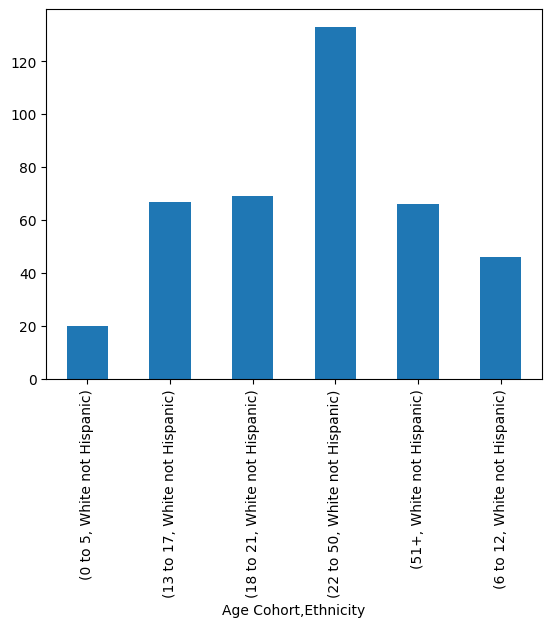

In [60]:
# YOUR CODE HERE (although you may want to add more code cells)
# distribution among age groups within white not hispanic
dwnh.drop(df[df['Ethnicity'] != 'White not Hispanic'].index, inplace=True)
dwnh.groupby('Age Cohort')['Ethnicity'].value_counts().plot(kind='bar')


By looking at this bar graph, you notice the age cohort of 22-50 is clearly the highest volume of expenditures while 13-17, 18-21, and 51+ all had very similar expenditure numbers. This can cause a lower avg since there is a larger set of data to calculate from.

<AxesSubplot:xlabel='Age Cohort,Ethnicity'>

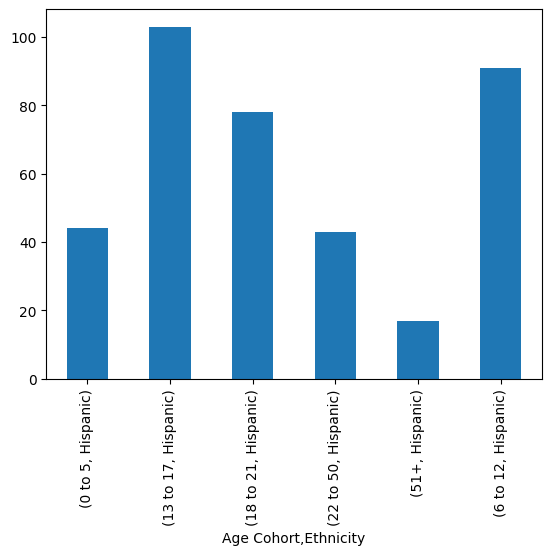

In [61]:
# distribution among age groups within hispanic
dh.drop(df[df['Ethnicity'] != 'Hispanic'].index, inplace=True)
dh.groupby('Age Cohort')['Ethnicity'].value_counts().plot(kind='bar')

By looking at this bar graph, you notice the age cohort of 13-17 is clearly the highest volume of expenditures for hispanic group and the lowest is 51+ which can be the cause of the bloated average expenditures in this group.

<AxesSubplot:xlabel='Age Cohort'>

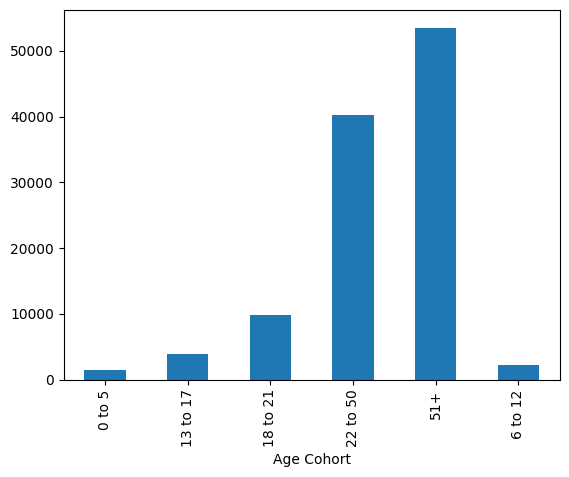

In [62]:
# avg expenditures for each age group regardless of race
df.groupby('Age Cohort')['Expenditures'].mean().plot(kind='bar')

**YOUR EXPLANATION HERE (although you may want to add more markdown cells)**
When looking at the mean expenditures per age group, you notice most of the data lies in the 51+ range. However when analyzing the other plots, you realize the hispanic group has a higher avg for the 51+ since they have lower volume of 51+ entries. The discrepancies are caused by the volume of entries in the group. The numbers were recorded were very unequal between both groups which caused the averages to look similar while they are not truly the same. 